In [80]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import re
from config import client, client_secret

In [9]:
# define path to csv file
file_path = 'data/income-inequality-.csv'

# read economic data csv intp pandas df
econ_df = pd.read_csv(file_path)
econ_df.head()

,ind_id,ind_definition,reportyear,race_eth_code,race_eth_name,geotype,geotypevalue,geoname,county_name,county_fips,...,Gini_index,LL_95CI,UL_95CI,se,rse,CA_decile,CA_RR,Median_HH_income,Median_HH_decile,version
0,556,Income inequality: Gini coefficient describing...,2005-2007,9,Total,CA,6,California,NaN,NaN,...,0.468,0.465617,0.470383,0.001216,0.259787,NaN,NaN,NaN,NaN,03/26/2014 12:00:00 AM
1,556,Income inequality: Gini coefficient describing...,2006-2010,9,Total,CA,6,California,NaN,NaN,...,0.469,0.467809,0.470191,0.000608,0.129617,NaN,NaN,NaN,NaN,03/26/2014 12:00:00 AM
2,556,Income inequality: Gini coefficient describing...,2008-2010,9,Total,CA,6,California,NaN,NaN,...,0.471,0.468617,0.473383,0.001216,0.258133,NaN,NaN,NaN,NaN,03/26/2014 12:00:00 AM
3,556,Income inequality: Gini coefficient describing...,2005-2007,9,Total,CO,6001,Alameda,Alameda,6001.0,...,0.455,0.449043,0.460957,0.003040,0.668025,NaN,0.972222,66430.0,3.0,03/26/2014 12:00:00 AM
4,556,Income inequality: Gini coefficient describing...,2005-2007,9,Total,CO,6003,Alpine,Alpine,6003.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,03/26/2014 12:00:00 AM


In [10]:
econ_df.describe()

,ind_id,race_eth_code,geotypevalue,county_fips,region_code,Number_Households,Gini_index,LL_95CI,UL_95CI,se,rse,CA_decile,CA_RR,Median_HH_income,Median_HH_decile
count,4788.0,4788.0,4788.000000,4743.000000,4785.000000,4.788000e+03,2345.000000,2345.000000,2345.000000,2345.000000,2345.000000,2140.000000,2342.000000,1967.000000,1967.000000
mean,556.0,9.0,40680.393484,6057.977862,7.930408,3.108647e+04,0.403342,0.344789,0.462682,0.033734,11.056622,5.498598,0.859480,63383.262328,5.496187
std,0.0,0.0,25836.291577,31.050892,4.564702,3.704397e+05,0.075310,0.101299,0.087781,0.178356,121.118065,2.872464,0.160489,26992.619504,2.864499
min,556.0,9.0,1.000000,6001.000000,1.000000,0.000000e+00,0.004000,0.000000,0.007574,0.000608,0.129617,1.000000,0.008529,13588.000000,1.000000
25%,556.0,9.0,17480.500000,6035.000000,4.000000,2.647500e+02,0.375000,0.314064,0.418596,0.010942,2.643055,3.000000,0.797656,45191.500000,3.000000
50%,556.0,9.0,40382.000000,6059.000000,8.000000,1.253500e+03,0.410000,0.369596,0.452000,0.018845,4.526935,5.000000,0.874066,57240.000000,6.000000
75%,556.0,9.0,60609.500000,6083.000000,12.000000,6.668750e+03,0.443000,0.405851,0.495660,0.039514,10.318185,8.000000,0.944563,75753.000000,8.000000
max,556.0,9.0,87090.000000,6115.000000,14.000000,1.257750e+07,0.775000,0.599851,1.000000,8.544073,5852.104759,10.000000,1.652452,223611.000000,10.000000


In [12]:
# drop rows where gini index or median household income is na
econ_df = econ_df.dropna(subset=['Gini_index', 'Median_HH_income'])
econ_df.describe()

,ind_id,race_eth_code,geotypevalue,county_fips,region_code,Number_Households,Gini_index,LL_95CI,UL_95CI,se,rse,CA_decile,CA_RR,Median_HH_income,Median_HH_decile
count,1967.0,1967.0,1967.000000,1967.000000,1967.000000,1.967000e+03,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000,1807.000000,1967.000000,1967.000000,1967.000000
mean,556.0,9.0,40210.172852,6057.173869,8.791561,3.565121e+04,0.415964,0.372627,0.459301,0.022111,5.429507,5.170448,0.886523,63383.262328,5.496187
std,0.0,0.0,26203.920773,29.458529,4.941290,1.609551e+05,0.051717,0.060967,0.062142,0.017034,4.230913,2.675667,0.110191,26992.619504,2.864499
min,556.0,9.0,135.000000,6001.000000,1.000000,6.700000e+01,0.112000,0.048851,0.175149,0.001216,0.247618,1.000000,0.238806,13588.000000,1.000000
25%,556.0,9.0,15522.000000,6037.000000,4.000000,1.703500e+03,0.386000,0.340117,0.420074,0.010334,2.541930,3.000000,0.823028,45191.500000,3.000000
50%,556.0,9.0,40354.000000,6059.000000,10.000000,8.838000e+03,0.413000,0.377319,0.449319,0.016413,3.993522,5.000000,0.880597,57240.000000,6.000000
75%,556.0,9.0,61068.000000,6079.000000,14.000000,2.311700e+04,0.444000,0.410245,0.487149,0.028571,6.956782,7.000000,0.946638,75753.000000,8.000000
max,556.0,9.0,87090.000000,6115.000000,14.000000,3.241204e+06,0.682000,0.577532,0.935213,0.156231,28.766826,10.000000,1.454158,223611.000000,10.000000


In [81]:
# There's multiple entries for each city because there are multiple report years. Let's average the data together by geoname
# Only interested in averaging Number_HOuseholds, Gini_index, CA_RR, Median_HH_income
temp_df = econ_df[['geoname', 'geotype', 'Number_Households', 'Gini_index', 'CA_RR', 'Median_HH_income']]
avg_econ_df = temp_df.groupby(['geoname', 'geotype']).mean()
# reset index
avg_econ_df.reset_index(inplace=True)

# filter for only cities (geo type == PL)
cities_df = avg_econ_df[avg_econ_df['geotype']=='PL']
# sort by number of households
cities_df = cities_df.sort_values(['Number_Households'], ascending=False)
# reset index
cities_df = cities_df.reset_index()
# drop original index column
cities_df = cities_df.drop(columns=['index'])

# regex to search for ' city' at the end of the string
p = re.compile(r' city$')
# remove the ' city' at the end of each geoname
cities_df['geoname'] = cities_df['geoname'].apply(lambda x: p.sub('', x))

# select the top n cities by population
n = 50
cities_df.head(n)

,geoname,geotype,Number_Households,Gini_index,CA_RR,Median_HH_income
0,Los Angeles,PL,1318168.0,0.523667,1.115771,48058.666667
1,San Diego,PL,483092.0,0.463000,0.986490,61315.666667
2,San Francisco,PL,345811.0,0.507333,1.080976,69534.000000
3,San Jose,PL,301366.0,0.432000,0.920463,77969.333333
4,Sacramento,PL,174624.0,0.441333,0.940324,49225.666667
5,Long Beach,PL,163531.0,0.469667,1.000711,50112.666667
6,Fresno,PL,158349.0,0.468667,0.998541,42122.666667
7,Oakland,PL,153791.0,0.506000,1.078133,48998.000000
8,Bakersfield,PL,111132.0,0.438667,0.934661,52353.333333
9,Anaheim,PL,98294.0,0.421667,0.898458,56872.666667


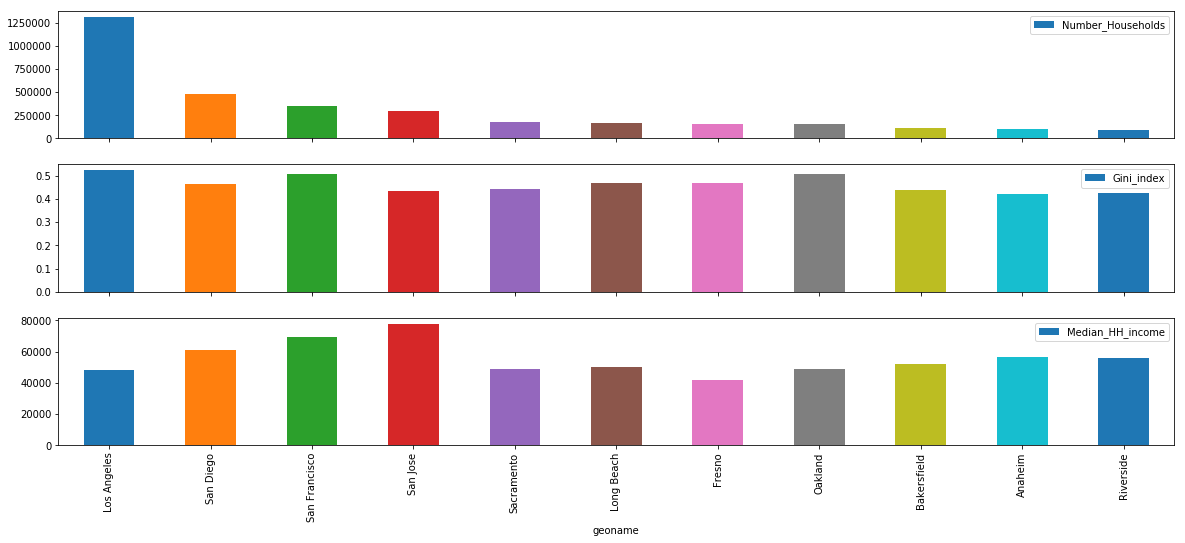

In [82]:
# create bargraphs of population, gini index, and median hh income
fig = plt.figure(figsize=(20,8))
# variable for how top n cities to show
n = 10
top_cities_df = cities_df.loc[0:n]

# create three subplots in a loop to graph all these
measures = ['Number_Households', 'Gini_index', 'Median_HH_income']
for i, measure in zip(range(1,4), measures):
    # create axes onbject
    axi = fig.add_subplot(3,1,i)
    # create graph
    top_cities_df.plot(kind='bar', x='geoname', y=measure, ax=axi, sharex=True)

Text(0.5, 1.0, 'Median HH income vs Number of Households')

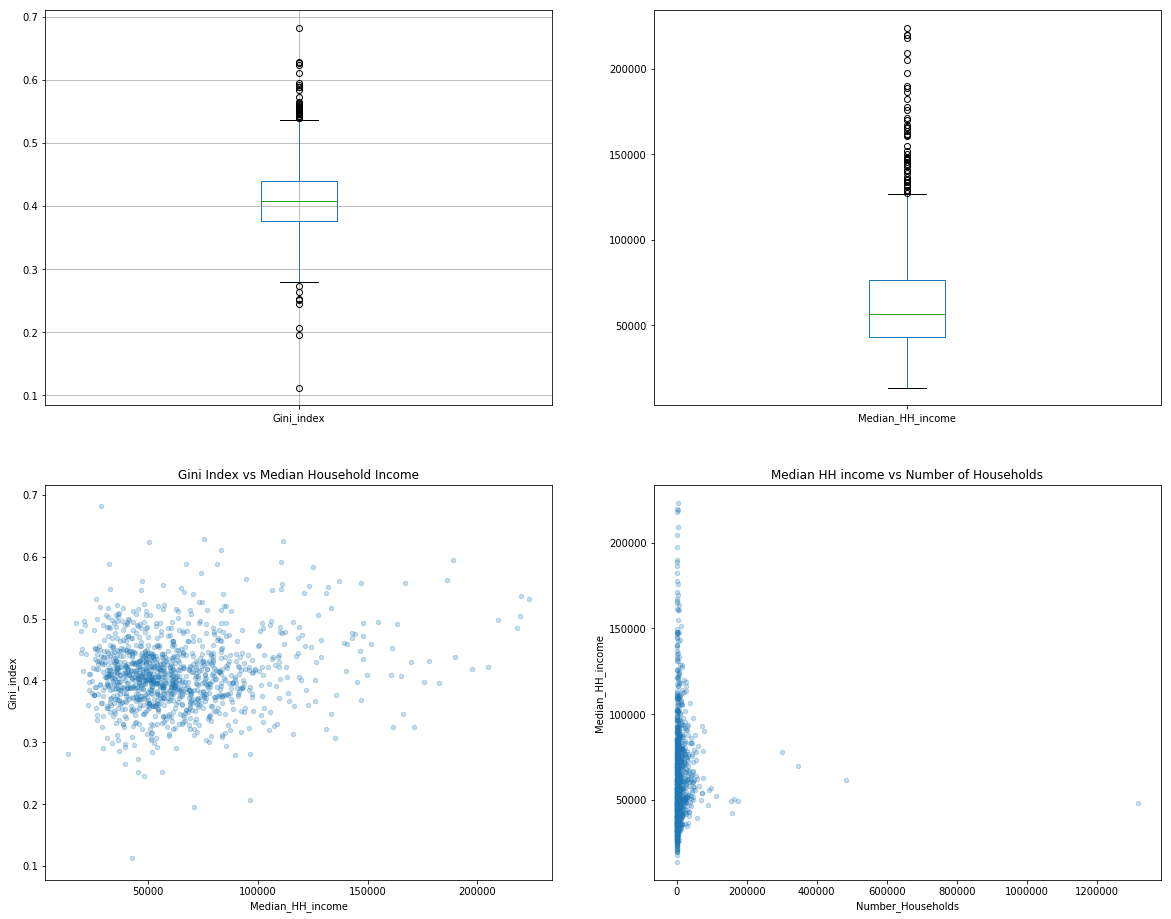

In [83]:
# let's visually explore the data
# create figure and axes objects for the subplots. These are graphed in a 2 x 2 grid
fig = plt.figure(figsize=(20,16))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

# make the top row box plots for gini and median incomes. This will visualize outliers
cities_df.boxplot(column='Gini_index', ax=ax1)
cities_df.plot(kind='box', y='Median_HH_income', ax=ax2)

# Use the bottom row for scatter plots showing relationships between variables
cities_df.plot(kind='scatter', x='Median_HH_income', y='Gini_index', ax=ax3, alpha=0.25)
ax3.set_title('Gini Index vs Median Household Income')

cities_df.plot(kind='scatter', x='Number_Households', y='Median_HH_income', ax=ax4, alpha=0.25)
ax4.set_title('Median HH income vs Number of Households')

In [84]:
# Define function to build query url and make api call to 4square
def get_data(location, client=client, client_secret=client_secret, time='any', openNow=0, price='1,2,3,4', v='20191206'):
    """
    Takes the desired parameters, builds the search, and makes an api call to foursquare. Returns a json response.
    
    Currently the valid range of price points are [1,2,3,4], 1 being the least expensive, 4 being the most expensive. 
    For food venues, in the United States, 1 is < $10 an entree, 2 is $10-$20 an entree, 3 is $20-$30 an entree, 4 is > $30 an entree.
    """
    # assemble the parameters into search strings
    base_uri = 'https://api.foursquare.com/v2/venues/explore?'
    near = 'near=' + location + ', CA, United States'
    price = f'price={price}'
    time = f'time={time}'
    openNow = f'openNow={openNow}'
    authentication = f'client_id={client}&client_secret={client_secret}&v={v}'
    
    # join each seach parameter using '&'
    param_str = '&'.join([near, time, openNow, price, authentication])
    search_url = base_uri + param_str
    
    # make the api call
    response = requests.get(search_url)
    return response.json()
    

In [125]:
n = 200
locations = cities_df.loc[:, 'geoname']
locations

0               Los Angeles
1                 San Diego
2             San Francisco
3                  San Jose
4                Sacramento
5                Long Beach
6                    Fresno
7                   Oakland
8               Bakersfield
9                   Anaheim
10                Riverside
11                 Stockton
12                   Irvine
13              Chula Vista
14         Huntington Beach
15                Santa Ana
16                 Glendale
17                  Fremont
18                  Modesto
19               Santa Rosa
20            Santa Clarita
21           San Bernardino
22                Oceanside
23                 Torrance
24                 Pasadena
25         Rancho Cucamonga
26                Sunnyvale
27            Moreno Valley
28                   Oxnard
29                  Fontana
               ...         
1103       French Gulch CDP
1104           Meridian CDP
1105             Manton CDP
1106              Ducor CDP
1107       Round Val

In [130]:
# Get the following data for each county: venue id, venue name, category name, and price
# price isn't returned in the response, but we can filter for it initially. We'll just need to make 1 request at each price point (1-4)
prices = range(1,5)

# slice the sorted df for the top n cities by households
n = 500
locations = cities_df.loc[:n, 'geoname']

# create empty list to hold dictionaries for all venue data
all_venues = []

# loop through all counties
for location in locations:
    print(f'Getting data for {location}...')
    # make an api call for each price point
    for price in prices:
        r = get_data(location, price=price)
        
        # check if the response was 2XX
        code = str(r['meta']['code'])
        if code[0] != '2':
            print(f'Error {code}')
            continue
            
        # find the number of total results and just move on if it's 0 (don't try to process the data because there isn't any!)
        totalR = r['response']['totalResults']
        if totalR == 0:
            continue

        # locate where the venues data is stored
        venues = r['response']['groups'][0]['items']

        # loop through all the returned venues
        for venue in venues:
            v = venue['venue']

            # initialize empty dictionary to hold data for an individual venue
            venue_dict = {}

            # add data to venue_dict
            venue_dict = {
                'Venue id': v['id'],
                'Venue Name': v['name'],
                'Location': location,
                'Price': price
            }

            # get the list of categories. There may be more than 1.
            v_cat = v['categories']    
            # initialize index for number of subcategories
            subcategory = 1

            # Loop through eacch category in the list and extract the category name
            for cat in v_cat:
                # check if the category is the primary key
                if cat['primary']: 
                    venue_dict['Primary category'] = cat['name']
                # otherwise, create a unique column for each non-primary venue category
                else:
                    venue_dict[f'Subcategory {subcategory}'] = cat['name']
                    subcategory += 1

            # append the dictionary to the list for all our venues
            all_venues.append(venue_dict)
    print('Done!')
            
print('All data gathering complete!')

Getting data for Los Angeles...
Done!
Getting data for San Diego...
Done!
Getting data for San Francisco...
Done!
Getting data for San Jose...
Done!
Getting data for Sacramento...
Done!
Getting data for Long Beach...
Done!
Getting data for Fresno...
Done!
Getting data for Oakland...
Done!
Getting data for Bakersfield...
Done!
Getting data for Anaheim...
Done!
Getting data for Riverside...
Done!
Getting data for Stockton...
Done!
Getting data for Irvine...
Done!
Getting data for Chula Vista...
Done!
Getting data for Huntington Beach...
Done!
Getting data for Santa Ana...
Done!
Getting data for Glendale...
Done!
Getting data for Fremont...
Done!
Getting data for Modesto...
Done!
Getting data for Santa Rosa...
Done!
Getting data for Santa Clarita...
Done!
Getting data for San Bernardino...
Done!
Getting data for Oceanside...
Done!
Getting data for Torrance...
Done!
Getting data for Pasadena...
Done!
Getting data for Rancho Cucamonga...
Done!
Getting data for Sunnyvale...
Done!
Getting dat

ConnectionError: HTTPSConnectionPool(host='api.foursquare.com', port=443): Max retries exceeded with url: /v2/venues/explore?near=Beverly%20Hills,%20CA,%20United%20States&time=any&openNow=0&price=1&client_id=UZXIPYQ2CSFLPXBDCQTUKIETXYTK1EXJWSEMELCVDHSEZOOF&client_secret=1ERBZHULD03ZGTO3EKVYGIUVWV04Z2I1G2GQQTNOSBWWNPXB&v=20191206 (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x11bcb0940>: Failed to establish a new connection: [Errno 60] Operation timed out',))

In [131]:
# create a df to see our data for alemeda county
venues_df = pd.DataFrame(all_venues)
venues_df.head()

""


In [128]:
venues_df.shape

(3138, 5)

In [129]:
venues_df[venues_df['Price']>1]

,Location,Price,Primary category,Venue Name,Venue id
30,Los Angeles,2,Wine Bar,Wally's,549a5c29498e7529d1aae65d
31,Los Angeles,2,Ice Cream Shop,Salt & Straw,563fdd4ccd1088eed9da1cc6
32,Los Angeles,2,Art Museum,Los Angeles County Museum of Art (LACMA),40a6af00f964a52027f31ee3
33,Los Angeles,2,Wine Shop,Silver Lake Wine,4a56353df964a520c1b41fe3
34,Los Angeles,2,Music Venue,The Hollywood Bowl,4161e400f964a5206f1d1fe3
35,Los Angeles,2,Farmers Market,The Original Farmers Market,4a47e4f1f964a52040aa1fe3
36,Los Angeles,2,Farmers Market,Hollywood Farmer's Market,49c53ab6f964a520ea561fe3
37,Los Angeles,2,Sandwich Place,Mendocino Farms,524f7377498e1c862a0f5cf7
38,Los Angeles,2,Mexican Restaurant,Tocaya Organica,5705a4e3498ea0a84f29d7f6
39,Los Angeles,2,Coffee Shop,Blue Bottle Coffee,56e59bb0498e29dda29f7621


In [116]:
# save venues_df to a csv so we don't have to make the api call every time
venues_df.to_csv('data/venues_data_by_cityV2.csv')
print('Dataframe saved to csv!')

Dataframe saved to csv!


In [117]:
# What are the value counts for each county?
venue_counts = venues_df['Primary category'].value_counts()
venue_counts

Coffee Shop                   535
Mexican Restaurant            525
Burger Joint                  349
American Restaurant           335
Pizza Place                   270
Sandwich Place                207
Italian Restaurant            205
Sushi Restaurant              192
Bakery                        189
Seafood Restaurant            172
Ice Cream Shop                145
Fast Food Restaurant          143
Brewery                       142
Café                          138
Breakfast Spot                121
Chinese Restaurant            120
Japanese Restaurant           116
Steakhouse                    111
Thai Restaurant               104
Vietnamese Restaurant          96
Bar                            90
Mediterranean Restaurant       79
Diner                          73
Restaurant                     73
Juice Bar                      73
BBQ Joint                      71
New American Restaurant        67
Asian Restaurant               67
Frozen Yogurt Shop             64
Deli / Bodega 

In [118]:
# Let's encode the prices with more descriptive categories
price_key = {1:'Low',
            2:'Moderate',
            3:'Expensive',
            4:'Very Expensive'}
# change the numbers in the price column to their string descriptions
venues_df['Price'] = [price_key[price] for price in venues_df['Price']]
venues_df.head()

,Location,Price,Primary category,Venue Name,Venue id
0,Los Angeles,Low,Art Museum,J. Paul Getty Museum,427ff980f964a520c7211fe3
1,Los Angeles,Low,Bookstore,The Last Bookstore,4dee93a0d4c019425301dd4e
2,Los Angeles,Low,Art Museum,The Broad,4eeb4c14b634b469c36a8c80
3,Los Angeles,Low,Ice Cream Shop,Salt & Straw,58a5368530ecc618cd3d30cf
4,Los Angeles,Low,Ice Cream Shop,Salt & Straw,5801612a38fab747a494609b


In [119]:
# get the frequency of each venue for each county. 
# One hot encode the venue categories
one_hot_venues = pd.get_dummies(venues_df, columns=['Primary category', 'Price'], prefix_sep=': ')
# gorup by the counties by mean to get the frequency opf each category
freq_df = one_hot_venues.groupby('Location').mean()
freq_df

,Primary category: Afghan Restaurant,Primary category: American Restaurant,Primary category: Argentinian Restaurant,Primary category: Art Museum,Primary category: Asian Restaurant,Primary category: Australian Restaurant,Primary category: BBQ Joint,Primary category: Bagel Shop,Primary category: Bakery,Primary category: Bar,...,Primary category: Whisky Bar,Primary category: Wine Bar,Primary category: Wine Shop,Primary category: Winery,Primary category: Wings Joint,Primary category: Zoo,Price: Expensive,Price: Low,Price: Moderate,Price: Very Expensive
Location,,,,,,,,,,,,,,,,,,,,,
Alameda,0.016393,0.032787,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032787,0.032787,...,0.000000,0.000000,0.0,0.016393,0.000000,0.000000,0.016393,0.491803,0.491803,0.000000
Alhambra,0.000000,0.034483,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068966,0.000000,...,0.000000,0.017241,0.0,0.000000,0.017241,0.000000,0.068966,0.517241,0.413793,0.000000
Anaheim,0.000000,0.051282,0.000000,0.000000,0.012821,0.000000,0.012821,0.000000,0.012821,0.000000,...,0.000000,0.025641,0.0,0.000000,0.000000,0.000000,0.179487,0.384615,0.384615,0.051282
Antioch,0.000000,0.063830,0.000000,0.000000,0.042553,0.000000,0.000000,0.021277,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.638298,0.361702,0.000000
Bakersfield,0.000000,0.030303,0.000000,0.000000,0.015152,0.000000,0.030303,0.015152,0.045455,0.030303,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.090909,0.454545,0.454545,0.000000
Berkeley,0.000000,0.014706,0.000000,0.000000,0.014706,0.000000,0.000000,0.000000,0.058824,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.102941,0.441176,0.441176,0.014706
Burbank,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015873,0.031746,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.031746,0.476190,0.476190,0.015873
Carlsbad,0.000000,0.106667,0.000000,0.000000,0.026667,0.000000,0.000000,0.000000,0.040000,0.026667,...,0.000000,0.013333,0.0,0.000000,0.000000,0.000000,0.120000,0.400000,0.400000,0.080000
Chico,0.000000,0.000000,0.000000,0.000000,0.015385,0.000000,0.000000,0.000000,0.015385,0.061538,...,0.000000,0.015385,0.0,0.000000,0.000000,0.000000,0.061538,0.461538,0.461538,0.015385


In [120]:
# merge the economic and venue data
econ_venue_merged_df = pd.merge(cities_df, freq_df, left_on = 'geoname', right_on='Location')
econ_venue_merged_df

,geoname,geotype,Number_Households,Gini_index,CA_RR,Median_HH_income,Primary category: Afghan Restaurant,Primary category: American Restaurant,Primary category: Argentinian Restaurant,Primary category: Art Museum,...,Primary category: Whisky Bar,Primary category: Wine Bar,Primary category: Wine Shop,Primary category: Winery,Primary category: Wings Joint,Primary category: Zoo,Price: Expensive,Price: Low,Price: Moderate,Price: Very Expensive
0,Los Angeles,PL,1318168.0,0.523667,1.115771,48058.666667,0.000000,0.034091,0.000000,0.034091,...,0.000000,0.011364,0.011364,0.000000,0.000000,0.000000,0.261364,0.340909,0.340909,0.056818
1,San Diego,PL,483092.0,0.463000,0.986490,61315.666667,0.000000,0.038462,0.000000,0.000000,...,0.012821,0.012821,0.000000,0.012821,0.000000,0.012821,0.192308,0.384615,0.384615,0.038462
2,San Francisco,PL,345811.0,0.507333,1.080976,69534.000000,0.000000,0.013514,0.013514,0.013514,...,0.000000,0.040541,0.000000,0.000000,0.000000,0.000000,0.229730,0.337838,0.405405,0.027027
3,San Jose,PL,301366.0,0.432000,0.920463,77969.333333,0.000000,0.044776,0.000000,0.000000,...,0.000000,0.014925,0.000000,0.000000,0.000000,0.000000,0.104478,0.447761,0.447761,0.000000
4,Sacramento,PL,174624.0,0.441333,0.940324,49225.666667,0.000000,0.089744,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.179487,0.384615,0.384615,0.051282
5,Long Beach,PL,163531.0,0.469667,1.000711,50112.666667,0.000000,0.082192,0.013699,0.000000,...,0.000000,0.013699,0.000000,0.000000,0.000000,0.000000,0.150685,0.410959,0.410959,0.027397
6,Fresno,PL,158349.0,0.468667,0.998541,42122.666667,0.000000,0.071429,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.114286,0.428571,0.428571,0.028571
7,Oakland,PL,153791.0,0.506000,1.078133,48998.000000,0.000000,0.027397,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.164384,0.410959,0.410959,0.013699
8,Bakersfield,PL,111132.0,0.438667,0.934661,52353.333333,0.000000,0.030303,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.454545,0.454545,0.000000
9,Anaheim,PL,98294.0,0.421667,0.898458,56872.666667,0.000000,0.051282,0.000000,0.000000,...,0.000000,0.025641,0.000000,0.000000,0.000000,0.000000,0.179487,0.384615,0.384615,0.051282


Text(0.5, 0, 'Percentage of Expensive ($$$) Venues')

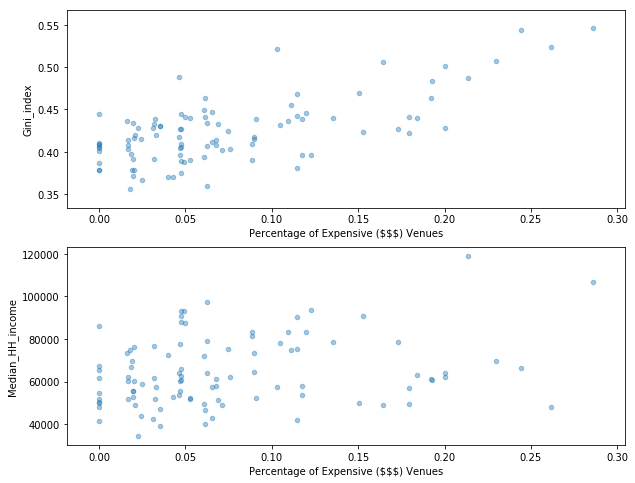

In [121]:
# make visualizations
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(211)
econ_venue_merged_df.plot(kind='scatter', x='Price: Expensive', y='Gini_index', ax=ax1, alpha=0.4)
ax1.set_xlabel('Percentage of Expensive ($$$) Venues')
# ax1.set_ylim((.0,1))

ax2 = fig.add_subplot(212)
econ_venue_merged_df.plot(kind='Scatter', x = 'Price: Expensive', y='Median_HH_income', alpha=0.4, ax=ax2)
ax2.set_xlabel('Percentage of Expensive ($$$) Venues')


In [122]:
freq_df.describe()

,Primary category: Afghan Restaurant,Primary category: American Restaurant,Primary category: Argentinian Restaurant,Primary category: Art Museum,Primary category: Asian Restaurant,Primary category: Australian Restaurant,Primary category: BBQ Joint,Primary category: Bagel Shop,Primary category: Bakery,Primary category: Bar,...,Primary category: Whisky Bar,Primary category: Wine Bar,Primary category: Wine Shop,Primary category: Winery,Primary category: Wings Joint,Primary category: Zoo,Price: Expensive,Price: Low,Price: Moderate,Price: Very Expensive
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,...,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,0.000500,0.053917,0.000816,0.000486,0.011378,0.000502,0.011732,0.004185,0.030200,0.014452,...,0.000452,0.005929,0.000278,0.002851,0.004422,0.000131,0.075241,0.486072,0.420475,0.018212
std,0.002828,0.031569,0.003589,0.003691,0.014227,0.003010,0.014276,0.008059,0.027398,0.016833,...,0.002569,0.010301,0.001962,0.014071,0.010325,0.001295,0.066332,0.087141,0.056816,0.019898
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.320000,0.219512,0.000000
25%,0.000000,0.032787,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015625,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.024543,0.441176,0.388856,0.000000
50%,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.006410,0.000000,0.023823,0.013606,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,0.468750,0.428571,0.015873
75%,0.000000,0.075475,0.000000,0.000000,0.018101,0.000000,0.016879,0.000000,0.040000,0.026024,...,0.000000,0.013333,0.000000,0.000000,0.000000,0.000000,0.110731,0.526316,0.461538,0.028278
max,0.016949,0.159091,0.020833,0.034091,0.045455,0.024390,0.054545,0.033333,0.180000,0.078125,...,0.015873,0.053333,0.015873,0.106667,0.045455,0.012821,0.285714,0.750000,0.535714,0.084337


In [123]:
venues_df.groupby('Location').count()

,Price,Primary category,Venue Name,Venue id
Location,,,,
Alameda,61,61,61,61
Alhambra,58,58,58,58
Anaheim,78,78,78,78
Antioch,47,47,47,47
Bakersfield,66,66,66,66
Berkeley,68,68,68,68
Burbank,63,63,63,63
Carlsbad,75,75,75,75
Chico,65,65,65,65
